In [1]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.tree import DecisionTreeRegressor

from sklearn.svm import SVR

from sklearn.neighbors import KNeighborsRegressor

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df = pd.read_csv('temperature.csv')
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


# EDA

In [3]:
df.shape

(7752, 25)

In [4]:
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

In [5]:
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

In [6]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [7]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

##### There is losts of null values so dropiing all rows

In [8]:
df.shape

(7752, 25)

In [9]:
df.dropna(inplace=True)

In [10]:
df.shape

(7588, 25)

In [11]:
(7588-7752)/7752

-0.021155830753353973

###### 0.2 percent data loss is not bad

In [12]:
df['station'].value_counts()

23.0    307
18.0    307
10.0    307
17.0    307
25.0    307
2.0     307
3.0     306
4.0     306
13.0    305
20.0    304
16.0    304
21.0    304
14.0    303
1.0     303
15.0    302
12.0    302
24.0    302
22.0    302
19.0    302
9.0     302
11.0    301
6.0     301
7.0     301
8.0     300
5.0     296
Name: station, dtype: int64

In [13]:
df.isna().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

# EDA

<AxesSubplot:>

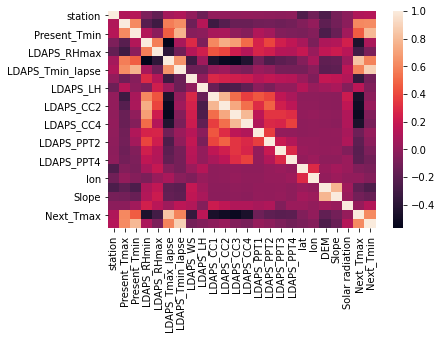

In [14]:
sns.heatmap(df.corr())

In [15]:
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,...,7588.000000,7588.000000,7588.000000,7588.000000,7588.00000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000
mean,13.014101,29.748366,23.195809,56.724969,88.360823,29.620128,23.511786,7.094097,62.492606,0.368510,...,0.480738,0.275007,0.265373,37.544792,126.99142,61.918136,1.259755,5343.724208,30.241526,22.910820
std,7.217858,2.967401,2.400880,14.626559,7.199456,2.943496,2.342579,2.177034,33.686158,0.262260,...,1.743327,1.146087,1.179661,0.050428,0.07922,54.323529,1.372748,429.782561,3.111807,2.482256
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.82600,12.370000,0.098500,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.600000,45.960243,84.203724,27.673756,22.086820,5.675358,37.206201,0.146546,...,0.000000,0.000000,0.000000,37.510200,126.93700,28.700000,0.271300,5001.485717,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.023199,89.784122,29.709537,23.758249,6.547838,56.898324,0.315706,...,0.000000,0.000000,0.000000,37.550700,126.99500,45.716000,0.618000,5441.987305,30.400000,23.100000
75%,19.000000,32.000000,24.800000,67.115099,93.742725,31.711109,25.155660,8.028960,84.235666,0.574174,...,0.017735,0.007855,0.000017,37.577600,127.04200,59.832400,1.767800,5729.485840,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.13500,212.335000,5.178200,5992.895996,38.900000,29.800000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7588 entries, 0 to 7749
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7588 non-null   float64
 1   Date              7588 non-null   object 
 2   Present_Tmax      7588 non-null   float64
 3   Present_Tmin      7588 non-null   float64
 4   LDAPS_RHmin       7588 non-null   float64
 5   LDAPS_RHmax       7588 non-null   float64
 6   LDAPS_Tmax_lapse  7588 non-null   float64
 7   LDAPS_Tmin_lapse  7588 non-null   float64
 8   LDAPS_WS          7588 non-null   float64
 9   LDAPS_LH          7588 non-null   float64
 10  LDAPS_CC1         7588 non-null   float64
 11  LDAPS_CC2         7588 non-null   float64
 12  LDAPS_CC3         7588 non-null   float64
 13  LDAPS_CC4         7588 non-null   float64
 14  LDAPS_PPT1        7588 non-null   float64
 15  LDAPS_PPT2        7588 non-null   float64
 16  LDAPS_PPT3        7588 non-null   float64


# Univariate Analysis

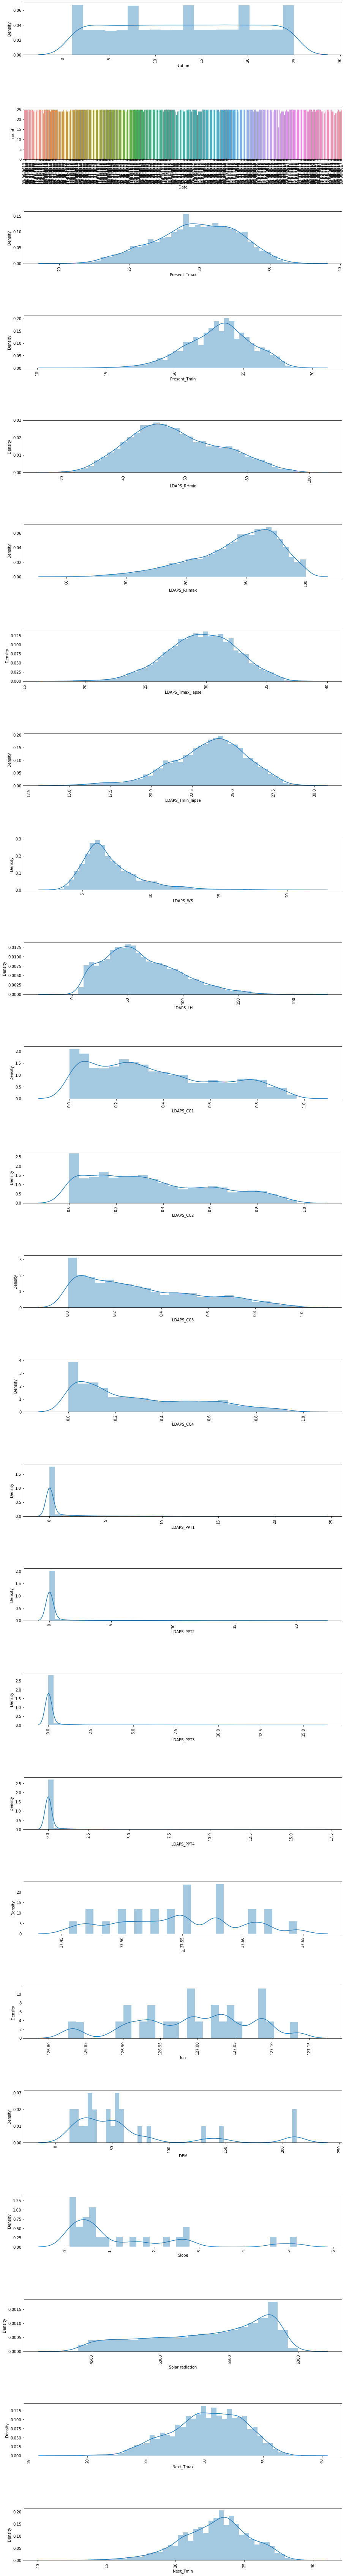

In [17]:
plt.figure(figsize=[15,200])
for i, column_data in enumerate(df.dtypes.items()):
    column,dtype = column_data
    plt.subplot(40,1,i+1)
    plt.subplots_adjust(hspace=1)
    
    if dtype == 'object':
        plt.xticks(rotation=90)
        sns.countplot(df[column])
    else:
        plt.xticks(rotation=90)
        sns.distplot(df[column],kde=True)

##### WE can see tht all most all column are nomrlay distributed Except few

# Bivariate Analysis

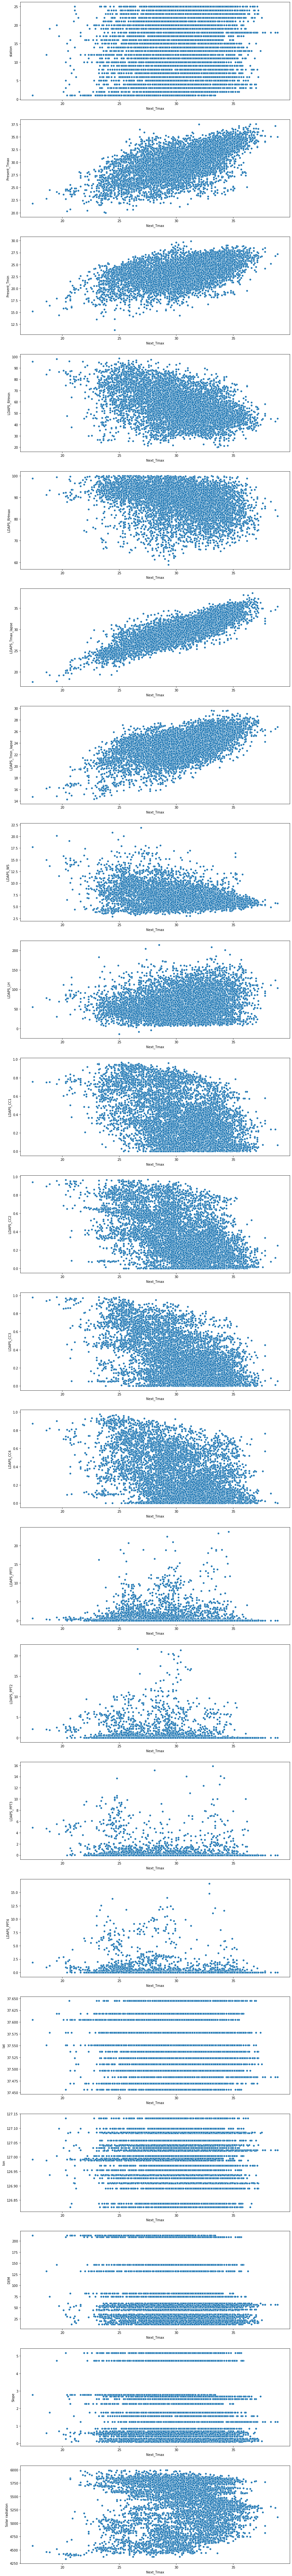

In [18]:
plt.figure(figsize=[15,200])
j = 0 
for column, dtype in df.drop(['Next_Tmax','Next_Tmin'],axis=1).dtypes.items():
    if dtype != 'object':
        plt.subplot(30,1,j+1)   
        sns.scatterplot(df['Next_Tmax'],df[column])
        j += 1

##### We can see there is good Positive Relationsip Between 
* Peresent Tmax and Next_Tmax
* Peresent Tmin and Next_Tmax
* LDAPS_Max and Next_Tmax
* LDAPS_MIN and Next_Tmax

##### We can see there is good Negative Relationsip Between 
* LDAPS_CCA and Next_Tmax
* LDAPS_CC3 and Next_Tmax
* LDAPS_CC2 and Next_Tmax
* LDAPS_CC1 and Next_Tmax

In [19]:
df.skew().abs().sort_values()

station             0.004178
lat                 0.085377
LDAPS_Tmax_lapse    0.222349
Present_Tmax        0.257069
lon                 0.289048
LDAPS_RHmin         0.301396
Next_Tmax           0.334842
Present_Tmin        0.353822
Next_Tmin           0.393662
LDAPS_CC1           0.456716
LDAPS_CC2           0.473929
Solar radiation     0.524325
LDAPS_Tmin_lapse    0.574035
LDAPS_CC3           0.639649
LDAPS_LH            0.662971
LDAPS_CC4           0.663815
LDAPS_RHmax         0.845264
LDAPS_WS            1.553926
Slope               1.559050
DEM                 1.721617
LDAPS_PPT1          5.305906
LDAPS_PPT2          5.710360
LDAPS_PPT3          6.356670
LDAPS_PPT4          6.681256
dtype: float64

##### We can see there is a skewness we will Do power Transform 

# Doing Label Encoding

In [20]:
df = df.apply(LabelEncoder().fit_transform)

In [21]:
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,0,288,80,73,4400,4391,2255,2839,4278,4763,...,0,0,0,9,11,24,22,1574,92,75
1,1,288,112,75,3224,4136,3929,4186,1928,3306,...,0,0,0,9,16,11,9,1531,106,88
2,2,288,109,92,2450,1835,4186,4953,2925,726,...,0,0,0,8,19,9,5,1517,112,102
3,3,288,113,93,4396,6863,3786,3230,1855,4513,...,0,0,0,11,14,12,20,1500,118,106
4,4,288,107,78,4005,3951,3208,3426,2020,6767,...,0,0,0,7,24,10,8,1510,113,88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,20,302,24,37,18,813,2015,210,3921,55,...,0,0,0,7,17,5,10,38,77,40
7746,21,302,18,33,115,1781,1226,163,2096,5558,...,0,0,0,4,22,4,1,29,81,34
7747,22,302,26,30,43,895,1028,264,2950,4934,...,0,0,0,6,2,1,3,30,84,44
7748,23,302,26,36,14,678,1424,259,3784,2832,...,0,0,0,5,3,2,4,26,87,51


# Spliting the Data

In [22]:
X = df.drop(['Next_Tmax','Next_Tmin'],axis=1)
y = df[['Next_Tmax','Next_Tmin']]

# Doing Power Transform

In [23]:
X_transformed = PowerTransformer().fit_transform(X)
X = pd.DataFrame(X_transformed,columns=X.columns)

# Building Model

In [24]:
models = {
    'LinearRegression' : LinearRegression(),
    'Ridge' : Ridge(alpha=1.0),
    'Lasso' : Lasso(),
    'DecisionTreeRegressor' : DecisionTreeRegressor(),
    'KNeighborsRegressor' : KNeighborsRegressor(),
    'SVR' : SVR(),
}

In [25]:
def build_model(model_obj):
    
    name, model = model_obj
    
    if y_train.shape[1] > 1 and name == 'SVR':
        return (None, None, None, None, None, None)
    
    
    print('----------------------------------')
    print('*****',name,'******')
    print('----------------------------------')
    
    
        
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    
    mean_absolute_error_ = mean_absolute_error(y_test,y_pred)
    mean_squared_error_ = mean_squared_error(y_test,y_pred)
    r2_score_ = r2_score(y_test,y_pred)
    
    kFold = KFold(n_splits=3,shuffle=True,random_state=42)
    scores = cross_val_score(model,X,y,cv=kFold,scoring='r2',n_jobs=-1)
    
    mean_cv_scores = np.mean(scores)
    std_cv_scores = np.std(scores)
    
    diff_acc_score_cv_score = np.abs(r2_score_ - mean_cv_scores)
    
    print('mean_absolute_error: ',mean_absolute_error_)
    print('mean_squared_error: ',mean_squared_error_)
    print('r2_score: ',r2_score_)
    
    print('Cross Val Score: ',mean_cv_scores)
    print('Cross Val std: ',std_cv_scores)
    print('Diff Between score and CV score: ', diff_acc_score_cv_score)
    print('__________________________________________\n'*2)
    
    return (name, r2_score, mean_cv_scores, std_cv_scores, diff_acc_score_cv_score, model)

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,shuffle=True)

In [27]:
final_model_list = []
for one_model in models.items():
    
    name, score, mean_cv_scores, std_cv_scores, diff_acc_score_cv_score, model = build_model(one_model)
    if name != None:
        final_model_list.append({
            'name': name,
            'score': score,
            'mean_cv_scores': mean_cv_scores,
            'std_cv_scores': std_cv_scores,
            'diff_acc_score_cv_score': diff_acc_score_cv_score,
            'model': model,

        })
    

----------------------------------
***** LinearRegression ******
----------------------------------
mean_absolute_error:  9.837419891769805
mean_squared_error:  168.23385227785414
r2_score:  0.7929258787906235
Cross Val Score:  0.7895400570016792
Cross Val std:  0.0033004197695115246
Diff Between score and CV score:  0.00338582178894431
__________________________________________
__________________________________________

----------------------------------
***** Ridge ******
----------------------------------
mean_absolute_error:  9.837529896146174
mean_squared_error:  168.24091603473283
r2_score:  0.7929178994993369
Cross Val Score:  0.7895405709708175
Cross Val std:  0.0032960143097632735
Diff Between score and CV score:  0.003377328528519352
__________________________________________
__________________________________________

----------------------------------
***** Lasso ******
----------------------------------
mean_absolute_error:  10.207983673925268
mean_squared_error:  178.348

# Grid search CV with best model

In [28]:
# The Best model is 
sorted(final_model_list,key=lambda item : item['diff_acc_score_cv_score'])[0]['name']

'KNeighborsRegressor'

In [29]:
kNeighborsRegressor = sorted(final_model_list,key=lambda item : item['diff_acc_score_cv_score'])[0]['model']

In [30]:
param_grid = {
    'n_neighbors': [5,6,7],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'weights': ['uniform','distance'],
    'leaf_size' : [30,40],
}
gridSearchCV = GridSearchCV(KNeighborsRegressor(),param_grid=param_grid,n_jobs=-1)
gridSearchCV.fit(X_train,y_train)
print(gridSearchCV.best_score_)
print(gridSearchCV.best_params_)

0.8446658104473042
{'algorithm': 'auto', 'leaf_size': 30, 'n_neighbors': 6, 'weights': 'distance'}


In [31]:
pickle.dump(kNeighborsRegressor,open('kNeighborsRegressor.pkl','wb'))